# sql_challenge

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# from sqlalchemy import create_engine
# engine = create_engine('postgresql://localhost:5432/<your_db_name>')
# connection = engine.connect()

ModuleNotFoundError: No module named 'psycopg2'

In [7]:
# Study data files
salaries_path = "salaries.csv"
titles_path = "titles.csv"
employees_path = "employees.csv"

In [8]:
# Read the salaries and the titles data
salary_df = pd.read_csv(salaries_path)
titles_df = pd.read_csv(titles_path)
employees_df = pd.read_csv(employees_path)

In [ ]:
#Rename column
employees_renamed_df = employees_df.rename(columns={"emp_title_id": "title_id"})

In [26]:
#Merge files
complete_data=pd.merge(employees_renamed_df, titles_df, how='outer', on='title_id')
final_df = pd.merge(complete_data, salary_df, how= 'outer', on='emp_no')

In [28]:
final_df.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,Staff,40000
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,Staff,40000
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,Staff,56087
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,Staff,87084
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,Staff,63016


# Create Graphs

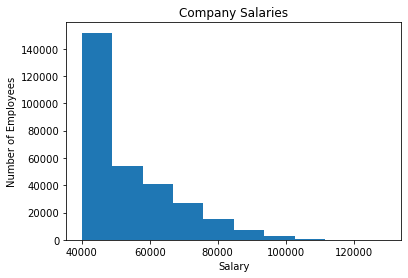

In [31]:
#Histogram

x = final_df['salary']
plt.hist(x, bins=10)
plt.title('Company Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

In [32]:
#Calculate average salary by title
final_grouped_df=final_df.groupby(['title'])
avg_salary_title=final_grouped_df['salary'].mean() 

Text(0, 0.5, 'Average Salary')

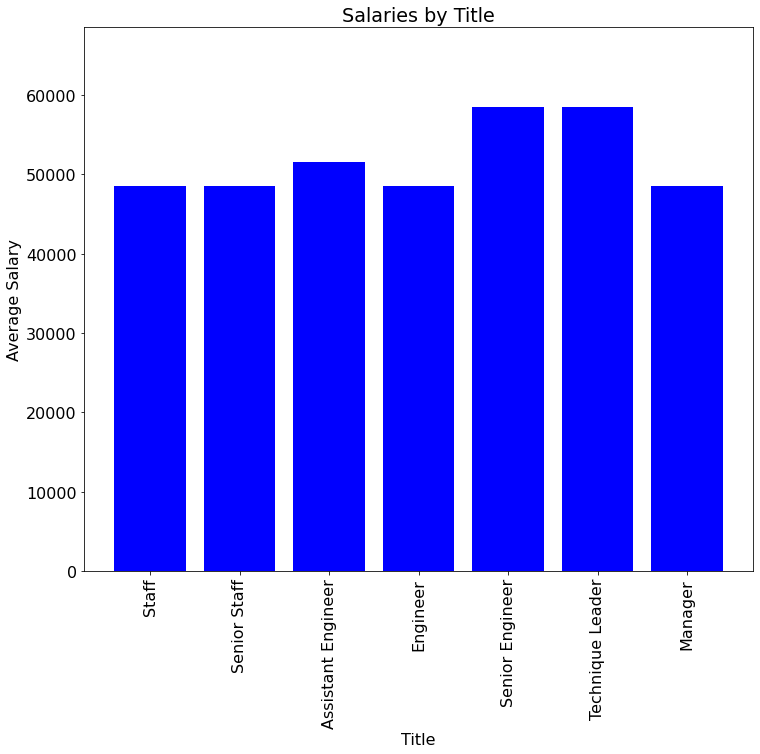

In [40]:
#Bar Chart
dnames= titles_df['title']

x_axis=range(len(dnames))
#y_axis=avg_salary_title
tick_locations=[value for value in x_axis]
plt.figure(figsize= (12,10))
plt.rcParams['font.size']='16'
plt.bar(x_axis, avg_salary_title, color='b', alpha=1.0, align="center")
plt.xticks(tick_locations, dnames, rotation="vertical")

plt.ylim(0, max(avg_salary_title)+10000)
plt.title('Salaries by Title')
plt.xlabel('Title')
plt.ylabel('Average Salary')